In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten, Reshape, Input, InputLayer,Conv2D,MaxPool2D,UpSampling2D,\
Conv2DTranspose,Cropping2D
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.callbacks import ModelCheckpoint

from Autoencoder import *
from make_video import *

import cv2
import os

1 Physical GPUs, 1 Logical GPUs


In [2]:
p_old=os.getcwd()

In [3]:
p= r'C:\Users\saad\Desktop\Autoencoders\Videos\Results\Rabbit_Frames'
p = p.replace('\\','/')
os.chdir(p)

In [4]:
os.getcwd()

'C:\\Users\\saad\\Desktop\\Autoencoders\\Videos\\Results\\Rabbit_Frames'

In [5]:
path = r'C:\Users\saad\Desktop\Autoencoders\Videos\Dataset'
vid_name = 'Rabbit_Video.mp4'

In [6]:
names,fps,width,height=read_video(os.getcwd(),os.path.join(path,vid_name))

Loading Video...
Completed


In [7]:
print(f'The fps is {fps}, The width of the frame is {width} and the height of the frame is {height}')

The fps is 25.0, The width of the frame is 3840 and the height of the frame is 2160


In [8]:
names

['frame_0.jpg',
 'frame_1.jpg',
 'frame_2.jpg',
 'frame_3.jpg',
 'frame_4.jpg',
 'frame_5.jpg',
 'frame_6.jpg',
 'frame_7.jpg',
 'frame_8.jpg',
 'frame_9.jpg',
 'frame_10.jpg',
 'frame_11.jpg',
 'frame_12.jpg',
 'frame_13.jpg',
 'frame_14.jpg',
 'frame_15.jpg',
 'frame_16.jpg',
 'frame_17.jpg',
 'frame_18.jpg',
 'frame_19.jpg',
 'frame_20.jpg',
 'frame_21.jpg',
 'frame_22.jpg',
 'frame_23.jpg',
 'frame_24.jpg',
 'frame_25.jpg',
 'frame_26.jpg',
 'frame_27.jpg',
 'frame_28.jpg',
 'frame_29.jpg',
 'frame_30.jpg',
 'frame_31.jpg',
 'frame_32.jpg',
 'frame_33.jpg',
 'frame_34.jpg',
 'frame_35.jpg',
 'frame_36.jpg',
 'frame_37.jpg',
 'frame_38.jpg',
 'frame_39.jpg',
 'frame_40.jpg',
 'frame_41.jpg',
 'frame_42.jpg',
 'frame_43.jpg',
 'frame_44.jpg',
 'frame_45.jpg',
 'frame_46.jpg',
 'frame_47.jpg',
 'frame_48.jpg',
 'frame_49.jpg',
 'frame_50.jpg',
 'frame_51.jpg',
 'frame_52.jpg',
 'frame_53.jpg',
 'frame_54.jpg',
 'frame_55.jpg',
 'frame_56.jpg',
 'frame_57.jpg',
 'frame_58.jpg',
 'frame

In [9]:
images = np.array(read_imgs(os.getcwd(),names,2,640,480))
images = images.astype('float32')/255.
print(f'The shape of the images is {images.shape}')

The shape of the images is (532, 480, 320, 3)


In [10]:
img_shape = images.shape[1:]
print(img_shape)

(480, 320, 3)


In [11]:
model1,model2 = build_autoencoder(img_shape,512,'Hi-Res',None)

In [12]:
weights = r'C:\Users\saad\Desktop\Autoencoders\Videos\Results\Weights'
weights = weights.replace('\\','/')


In [13]:
model1.load_weights(os.path.join(weights,'model1.hdf5'))
model2.load_weights(os.path.join(weights,'model2.hdf5'))

In [14]:
img_new = model1.predict(images)

In [15]:
img_new.shape

(532, 480, 320, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


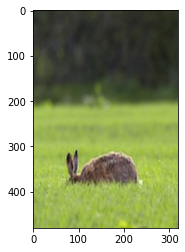

In [16]:
import matplotlib.pyplot as plt
plt.imshow(img_new[75,:,:,:])

In [17]:
from tqdm import tqdm
import numpy as np
preds=[]
for i in tqdm(range(len(img_new))):
    preds.append(model2.predict(np.expand_dims(img_new[i],axis=0)))

100%|████████████████████████████████████████████████████████████████████████████████| 532/532 [00:19<00:00, 27.67it/s]


In [18]:
pr = np.array(preds)
pr.shape

(532, 1, 480, 320, 3)

In [19]:
pr= pr.reshape(532,480,320,3)

In [ ]:
plt.imshow(pr[75,:,:,:])

In [ ]:
plt.imshow(images[75,:,:,:])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


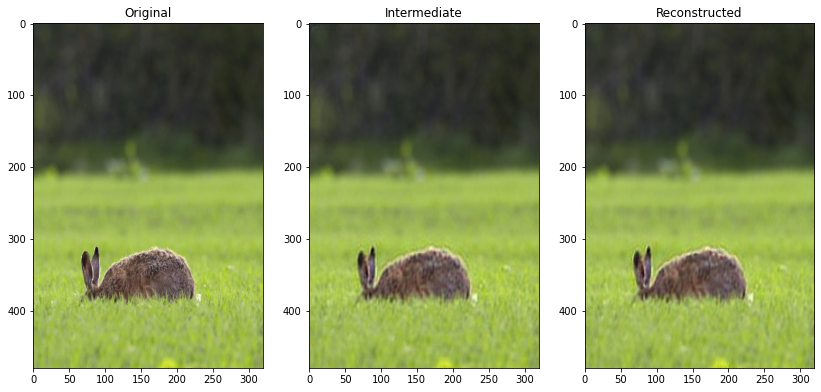

In [26]:
im = 3
plt.figure(figsize=(14,10))

plt.subplot(131)
plt.imshow(images[im,:,:,:])
plt.title('Original')

plt.subplot(132)
plt.imshow(img_new[im,:,:,:])
plt.title('Intermediate')

plt.subplot(133)
plt.imshow(pr[im,:,:,:])
plt.title('Reconstructed')

plt.show()

In [28]:
predictions = pr * 255.

In [30]:
VIDEO = r'C:\Users\saad\Desktop\Autoencoders\Videos\Results\Video'
video_creater('Recon_rabbit.avi',VIDEO,25.,640,480,predictions) 

Frames Saving:   4%|██▍                                                              | 20/532 [00:00<00:02, 197.19it/s]

Working on Reconstructed Video


Concatenating Frames: 100%|██████████████████████████████████████████████████████████| 266/266 [00:03<00:00, 72.71it/s]


Reconstructed Frames removed.


In [ ]:
 original_video('Original.avi',VIDEO,FRAMES,25.,names)

In [31]:
os.getcqd()

AttributeError: module 'os' has no attribute 'getced'